# Viral Tweets

In the following project, I'm going to use the K-Nearest Neighbor algorithm to predict whether a tweet will go viral. By doing do I will answer the following question:

Which features of a tweet are most closely linked to its popularity? Maybe the number of hashtags or the number of links in the tweet strongly influences its popularity. Maybe its virality is dependent on how many followers the person has. Maybe it's something more subtle like the specific language used in the tweets.

The question specifically I will aim to ask is: **What are the tweet features I can use to predict whether or not a tweet will go viral with the highest degree of accuracy?**

Let's explore these options by looking at the data we have available to us. We've imported the dataset and printed the following information:

* The total number of tweets in the dataset.
* The columns, or features, of the dataset.
* The text of the first tweet in the dataset.

Following Viral analysis of tweets, I'll aim to harness the power of Naive Bayes Classifier by discovering whether a tweet is from New York City, London and Paris. I'll investigate how language is used in three cities. 

The specific question I will ask will be: **Do tweet's language give any actional insight as to where the tweet originated from? And if so, with what degree of accuracy can I predict whether a tweet originated from New York, Paris or London?**


In [148]:
import pandas as pd

#Here we read in the dataset from the json file
all_tweets = pd.read_json("random_tweets.json", lines=True)

#Here we will find out the total number of all the tweets in the dataset
print('The total number of tweets in the dataset:', len(all_tweets))
print(all_tweets.columns)


#Let's look at the text of the first tweet
print('The text of the first tweet:', all_tweets.loc[0]['text'])




The total number of tweets in the dataset: 11099
Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'extended_entities', 'quoted_status',
       'withheld_in_countries'],
      dtype='object')
The text of the first tweet: RT @KWWLStormTrack7: We are more than a month into summer but the days are getting shorter. The sunrise is about 25 minutes later on July 3…


# Defining Viral Tweets

In order to predict whether or not a tweet is viral or not. We will use the K-Nearest Neighbors algorithm. We just have 2 issues we need to overcome first: 

1. There is no labeled data to tell us whether or not the tweet data is viral or not. So we'll have to make one.
2. Measuring whether or not a tweet is viral is subjective. I.e. There is no standardized definition 


To get around this, I will define a viral tweet as having more than the median number of retweets in the dataset.
Let's say we wanted to create a column called `is_viral` that is a `1` if the tweet had more than the median number of retweets and `0` otherwise. 

Aftwerwards, I will show you the value counts for the viral tweets versus the non viral tweets


In [149]:
import numpy as np
median = np.median(all_tweets['retweet_count'])
all_tweets['is_viral'] = np.where(all_tweets['retweet_count'] > median, 1, 0)
all_tweets['is_viral'].value_counts()

0    5562
1    5537
Name: is_viral, dtype: int64

# Making Features

Now that we've created a label for every tweet in our dataset, we can begin thinking about which features might determine whether a tweet is viral. We can create new columns in our dataset to represent these features. 

Ideally, we will look at the following characteristics of a tweet:

1. The number of followers of the tweet user
2. The length of the tweet. This can be thought of as the number of letters
3. The number of friends of the user
4. The number of words of the tweet


In [150]:
all_tweets['tweet_length'] = all_tweets.apply(lambda tweet: len(tweet['text']), axis=1)
all_tweets['followers_count'] = all_tweets.apply(lambda tweet: tweet['user']['followers_count'], axis=1)
all_tweets['friends_count'] = all_tweets.apply(lambda tweet: tweet['user']['friends_count'], axis=1)
all_tweets['num_of_words'] = all_tweets.apply(lambda tweet: len(tweet['text'].split()), axis=1)


# Normalizing The Data
Now that we have our feature data and our label data, we no longer need the other columns of dataset. 

Once we have selected the data we need for the algorithm, we need to scale it so as to normalize the data so it's all in the same range. I'll use sklearn's scale function to do this.


In [151]:
from sklearn.preprocessing import scale
#Create the label and our features
labels = all_tweets['is_viral']
data = all_tweets[['tweet_length', 'followers_count', 'friends_count', 'num_of_words']]

#Scale the data
scaled_data = scale(data, axis=0)

# Let's look at the first row of our numpy array to see the scaled data.
scaled_data[0]

array([ 0.6164054 , -0.02878298, -0.14483305,  1.15105133])

# Creating the Training Set and Test Set

Now that we have the feature data and the label data, we need to divide it into training data and testing data. 


In [152]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(scaled_data, labels, test_size = 0.2, random_state=1)


# Using the Classifier

To begin with, I'll use the 5 nearest neighbors to input into the K-Nearest Neighbors Algorithm. Although later, I'll test the accuracy of various different number of neighbors. I want to avoid overfitting the training data, and so initially chose 5. 


In [153]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(train_data, train_labels);

#Now let's see the accuracy of the model 
accuracy = classifier.score(test_data, test_labels)
accuracy

0.640990990990991

# Choosing K

Let's look at other numbers for k to find the input with the highest accuracy. As you can see from the graph below, The accuracy increases dramatically between 0-5. Afterwards, it decreases to roughly 63 percent with a k value any higher than 30. 

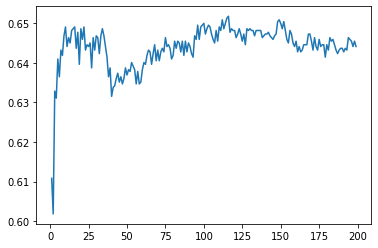

In [154]:
import matplotlib.pyplot as plt

scores = []
for k in range(1, 200):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_data, train_labels)
    scores.append(classifier.score(test_data, test_labels))
    
plt.plot(range(1, 200), scores)
plt.show()


# Accuracy 

From my analysis, I was able to get an accuracy of roughly 64%. This could potentially be increased by adding more features to the input data. 


# Classifying tweets: Investigating the data

First, I'll have a look at the New York data by first importing it and then discovering the following features:

1. The number of tweets 
2. The columns of the dataset
3. The text of the first tweet in the dataset 

This step is part of EDA and essential to ensure the dataset is meeting our expectations.

In [155]:
import pandas as pd
new_york_tweets = pd.read_json('new_york.json', lines=True)
len(new_york_tweets)
new_york_tweets.columns
new_york_tweets.loc[0].text

'@DelgadoforNY19 Calendar marked.'

All good. Now let's load in the data for Paris and New York.

In [156]:
paris_tweets = pd.read_json('paris.json', lines=True)
london_tweets = pd.read_json('london.json', lines=True)

len(paris_tweets)

2510

In [157]:
len(london_tweets)

5341

# Classifying using language: Naive Bayes Classifier

Now, I'll put all of the tweets for London, Paris and New York into a list with another list of their corresponding labels. In this case, 0 will represent New York, 1 will represent London and 2 will represent Paris. 

This will give us a list of all_tweets, which will contain all the tweets of all cities combined, as well as another list called labels, which will have all the labels for the tweets. 


In [158]:
#Convert from a Series to a list
new_york_text = new_york_tweets["text"].tolist()
paris_text = paris_tweets['text'].tolist()
london_text = london_tweets['text'].tolist()

#Combine all the tweets in a list
all_tweets = new_york_text + london_text + paris_text

#Give their relative labels: 0 for NY, 1, for London and 2 for Paris
labels = [0] * len(new_york_text) + ([1] * len(london_text)) + [2] * len(paris_text)

# Making a training and test set


For this part, I'll use sklearn's train_test_split function to divide the data into training and testing data. The test-size will be 0.2, meaning that of the data, 20 percent will be used for testing the model and 80 percent will be used for training the model. Let's begin.

In [159]:
#Import the function  
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(all_tweets, labels)
print(len(train_data))
print(len(test_data))

9430
3144


When using Naive Bayes Classifier, we need to covert our list of words into count vectors. Once we have the input to our classifier, I'll use CountVectorizer to train and test the Naive Bayes Classifier.

In [160]:
from sklearn.feature_extraction.text import CountVectorizer

#Create the counter object 
counter = CountVectorizer()

#Teach our counter the vocabulary 
counter.fit(train_data)

#Transform train data and test data into count vectors
train_counts = counter.transform(train_data)
test_counts = counter.transform(test_data)

train_data[3]
print(train_counts[3])

  (0, 3717)	1
  (0, 9699)	1


# Train and Test the Naive Bayes Classifier



In [161]:
from sklearn.naive_bayes import MultinomialNB

# Make a classifier 
classifier = MultinomialNB()

#Fit the data 
classifier.fit(train_counts, train_labels)

#Test our model 

predictions = classifier.predict(test_counts)

# Evaluating the model

Since we have fitted and transformed the data, I'll now see how well it did. I'll do this in two different ways:

1. Accuracy score 
2. Confusion matrix

Firstly, let's have a look at the accuracy score 

In [162]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, predictions)

0.6981552162849872

In [163]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, predictions)

array([[ 685,  461,   20],
       [ 274, 1008,   25],
       [  50,  119,  502]])

# Conclusion

The confusion matrix gives us greater insight into the model. With an accuracy score of 68%, this model needs improvement, although not bad for the first time round!
The confusion matrix tells us that New York tweets were for the overwhelming majority classified as from New York, although about 40% of the time New York tweets were misclassified as being from London. Whilst it rarely classified any tweets (32), as being from Paris. This is expected given that English is spoken in New York and London whereas in Paris French is spoken. 
With regard to London tweets, the accuracy was much higher, with around 80 percent classified correctly. Finally with tweets from Paris, most of them were correctly classified as Parisian, with around 20 percent incorrectly classified as London tweets and an even smaller proportion classified as New York. 